source : https://github.com/lovit/soynlp/blob/master/tutorials/doublespace_line_corpus_(with_noun_extraction).ipynb

# 2019. 7. 18. 목. 
# ΨNLP: TT(Training and Techniques) 3회차





## 0.  KoNLPy복습
### @YKLee 님 자료 참고


In [4]:
#!pip install konlpy
#!pip install konlt

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import sys
if sys.version_info <= (2,7):
    reload(sys)
    sys.setdefaultencoding('utf-8')
import konlpy
from konlpy.tag import Kkma, Okt, Hannanum

kkma = Kkma()
okt = Okt()
hannanum = Hannanum()
print('konlpy version = %s' % konlpy.__version__)

konlpy version = 0.5.1


# KoNLPy
Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
http://semanticweb.kaist.ac.kr/hannanum/
Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
http://kkma.snu.ac.kr/
Komoran: 코모란. Shineware에서 개발.
https://github.com/shin285/KOMORAN
Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
https://bitbucket.org/eunjeon/mecab-ko
Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
https://github.com/open-korean-text/open-korean-text

# 아래 문장을 형태소 분석기에 돌려봅니다.

'추천할 것이다. 학생들의 특성을 고려해서 수업을 짜는 것은 매우 중요한데 이러한 경험을 직접 해볼 수 있다는 것이 정말 좋은 점이라고 생각한다. 평소에 전공 수업을 들으면서 학생들의 개개인의 특성을 고려하여 어떻게 수업을 짤 수 있을지 생각해본 적이 없다. 조금 어렵고 고려해야할 점이 많기는 했지만 정말 중요하고 도움이 되는 실습이었기 때문에 해보면 좋을 것 같다.'

In [3]:
# 코모란 형태소 분석기 사용'
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.morphs('추천할 것이다. 학생들의 특성을 고려해서 수업을 짜는 것은 매우 중요한데 이러한 경험을 직접 해볼 수 있다는 것이 정말 좋은 점이라고 생각한다. 평소에 전공 수업을 들으면서 학생들의 개개인의 특성을 고려하여 어떻게 수업을 짤 수 있을지 생각해본 적이 없다. 조금 어렵고 고려해야할 점이 많기는 했지만 정말 중요하고 도움이 되는 실습이었기 때문에 해보면 좋을 것 같다.'))

#print(komoran.nouns())
#print(komoran.pos())

['추천', '하', 'ㄹ', '것', '이', '다', '.', '학생', '들', '의', '특성', '을', '고려', '하', '아서', '수업', '을', '짜', '는', '것', '은', '매우', '중요', '하', 'ㄴ데', '이러', '하', 'ㄴ', '경험', '을', '직접', '해보', 'ㄹ', '수', '있', '다는', '것', '이', '정말', '좋', '은', '점', '이', '라고', '생각', '하', 'ㄴ다', '.', '평소', '에', '전공', '수업', '을', '들', '으면서', '학생', '들', '의', '개개인', '의', '특성', '을', '고려', '하', '아', '어떻', '게', '수업', '을', '짜', 'ㄹ', '수', '있', '을지', '생각', '하', '아', '보', 'ㄴ', '적', '이', '없', '다', '.', '조금', '어렵', '고', '고려', '하', '아야', '하', 'ㄹ', '점', '이', '많', '기', '는', '하', '았', '지만', '정말', '중요', '하', '고', '도움', '이', '되', '는', '실습', '이', '었', '기', '때문', '에', '해보면', '좋', '을', '것', '같', '다', '.']


In [4]:
# Okt 형태소 분석기 사용
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs('추천할 것이다. 학생들의 특성을 고려해서 수업을 짜는 것은 매우 중요한데 이러한 경험을 직접 해볼 수 있다는 것이 정말 좋은 점이라고 생각한다. 평소에 전공 수업을 들으면서 학생들의 개개인의 특성을 고려하여 어떻게 수업을 짤 수 있을지 생각해본 적이 없다. 조금 어렵고 고려해야할 점이 많기는 했지만 정말 중요하고 도움이 되는 실습이었기 때문에 해보면 좋을 것 같다.', norm=True))

['추천', '할', '것', '이다', '.', '학생', '들', '의', '특성', '을', '고려', '해서', '수업', '을', '짜는', '것', '은', '매우', '중요한데', '이러한', '경험', '을', '직접', '해볼', '수', '있다는', '것', '이', '정말', '좋은', '점', '이라고', '생각', '한다', '.', '평소', '에', '전공', '수업', '을', '들으면서', '학생', '들', '의', '개개인', '의', '특성', '을', '고려', '하여', '어떻게', '수업', '을', '짤', '수', '있을지', '생각', '해본', '적', '이', '없다', '.', '조금', '어렵고', '고려', '해야', '할', '점', '이', '많기는', '했지만', '정말', '중요하고', '도움', '이', '되는', '실습', '이었기', '때문', '에', '해보면', '좋을', '것', '같다', '.']


In [5]:
# 꼬꼬마 형태소 분석기 사용
from konlpy.tag import Kkma  

kkma = Kkma()
text = '추천할 것이다. 학생들의 특성을 고려해서 수업을 짜는 것은 매우 중요한데 이러한 경험을 직접 해볼 수 있다는 것이 정말 좋은 점이라고 생각한다. 평소에 전공 수업을 들으면서 학생들의 개개인의 특성을 고려하여 어떻게 수업을 짤 수 있을지 생각해본 적이 없다. 조금 어렵고 고려해야할 점이 많기는 했지만 정말 중요하고 도움이 되는 실습이었기 때문에 해보면 좋을 것 같다.'
sentences = kkma.sentences(text)
print(sentences[0])
print(sentences[1])
print(sentences[2])
print(sentences[3])
print(kkma.pos(text))

추천할 것이다.
학생들의 특성을 고려해서 수업을 짜는 것은 매우 중요한 데 이러한 경험을 직접 해볼 수 있다는 것이 정말 좋은 점이라고 생각한다.
평소에 전공 수업을 들으면서 학생들의 개개인의 특성을 고려하여 어떻게 수업을 짤 수 있을지 생각해 본 적이 없다.
조금 어렵고 고려해야 할 점이 많기는 했지만 정말 중요하고 도움이 되는 실습이었기 때문에 해보면 좋을 것 같다.
[('추천', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'VCP'), ('다', 'EFN'), ('.', 'SF'), ('학생', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('특성', 'NNG'), ('을', 'JKO'), ('고려', 'NNP'), ('하', 'XSV'), ('어서', 'ECD'), ('수업', 'NNG'), ('을', 'JKO'), ('짜', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('은', 'JX'), ('매우', 'MAG'), ('중요', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('데', 'NNB'), ('이러하', 'VV'), ('ㄴ', 'ETD'), ('경험', 'NNG'), ('을', 'JKO'), ('직접', 'MAG'), ('해보', 'VV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VV'), ('다는', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('정말', 'MAG'), ('좋', 'VA'), ('은', 'ETD'), ('점', 'NNG'), ('이', 'VCP'), ('라고', 'ECD'), ('생각', 'NNG'), ('하', 'XSV'), ('ㄴ다', 'EFN'), ('.', 'SF'), ('평소', 'NNG'), ('에', 'JKM'), ('전공', 'NNG'), ('수업', 'NNG'), ('을', 'JKO'), ('듣', 'VV'), ('으면서', 'ECE'), ('학생',

In [6]:
print(kkma.morphs(text)) # Parse phrase to morphemes.
print(kkma.nouns(text)) # Noun extractor.
print(kkma.pos(text)) # POS tagger. parameters: flatten - If False, preserves eojoels.
print(kkma.sentences(text)) # Sentence detection.

['추천', '하', 'ㄹ', '것', '이', '다', '.', '학생', '들', '의', '특성', '을', '고려', '하', '어서', '수업', '을', '짜', '는', '것', '은', '매우', '중요', '하', 'ㄴ', '데', '이러하', 'ㄴ', '경험', '을', '직접', '해보', 'ㄹ', '수', '있', '다는', '것', '이', '정말', '좋', '은', '점', '이', '라고', '생각', '하', 'ㄴ다', '.', '평소', '에', '전공', '수업', '을', '듣', '으면서', '학생', '들', '의', '개개인', '의', '특성', '을', '고려', '하', '여', '어떻', '게', '수업', '을', '짜', 'ㄹ', '수', '있', '을지', '생각', '하', '어', '보', 'ㄴ', '적이', '없', '다', '.', '조금', '어렵', '고', '고려', '하', '어야', '하', 'ㄹ', '점', '이', '많', '기', '는', '하', '었', '지만', '정말', '중요', '하', '고', '도움', '이', '되', '는', '실습', '이', '었', '기', '때문', '에', '해보', '면', '좋', '을', '것', '같', '다', '.']
['추천', '학생', '특성', '고려', '수업', '중요', '데', '경험', '수', '점', '생각', '평소', '전공', '개개인', '도움', '실습', '때문']
[('추천', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'VCP'), ('다', 'EFN'), ('.', 'SF'), ('학생', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('특성', 'NNG'), ('을', 'JKO'), ('고려', 'NNP'), ('하', 'XSV'), ('어서', 'ECD'), ('수업', 'NNG'), ('을', 'JKO'), ('짜',

## 다음으로 Okt로 새로운 문장을 다뤄보겠습니다.

'교사가 되기 위해 이론적인 지식도 물론 중요하지만 학교 현장에서 다양하게 만나게 될 학습자들에 대한 지식은 더욱 중요하다고 생각한다 그러나 현재 배우고 있는 학교 현장에 대한 지식은 국어 전반에 대한 이론적 지식보다 비교적 적다고 생각한다 물론 교직 수업에서 학교 폭력의 이해 생활 지도 및 상담 등의 수업을 통해 학교 현장에서 실제로 일어나는 다양한 사례들을 확인할 수 있지만 이 역시도 이론적인 수업에 그치곤 한다 그러나 이 실습은 달랐다 학교 현장에 실제로 있을 법한 학습자들의 성격과 특성을 자세히 분석하였고 그런 실제적인 자료를 바탕으로 내가 직접 선생님의 역할이 되어 조별로 모둠을 편성하는 활동을 했다 이 과정을 통해 나중에 교사가 되어 현장에 나간다면 가르치는 것 말고도 여러모로 신경 써야 할 것들이 많다는 것을 깨닫게 되었다 또 학습자들의 특성을 하나하나 분석해보며 조 편성을 한다든지 반 전체 특성을 파악하여 더 좋은 방향으로 이끌어나가는 활동들은 정말 재미있었고 유익했다 학생들 개개인의 특성과 개성을 존중하고 창의성을 중시하는 분위기가 대두된 요즘 이러한 실습을 통해 열심히 공부하고 많이 연습해둔다면 나중에 현장에서 더 유연하고 능동적으로 활용할 수 있을 것이다 때문에 사범대의 교육과정 중 하나가 된다면 정말 좋을 것이라고 생각한다'



In [7]:
okt.tagset # 참고용

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [8]:
sentence = ('교사가 되기 위해 이론적인 지식도 물론 중요하지만 학교 현장에서 다양하게 만나게 될 학습자들에 대한 지식은 더욱 중요하다고 생각한다 그러나 현재 배우고 있는 학교 현장에 대한 지식은 국어 전반에 대한 이론적 지식보다 비교적 적다고 생각한다 물론 교직 수업에서 학교 폭력의 이해 생활 지도 및 상담 등의 수업을 통해 학교 현장에서 실제로 일어나는 다양한 사례들을 확인할 수 있지만 이 역시도 이론적인 수업에 그치곤 한다 그러나 이 실습은 달랐다 학교 현장에 실제로 있을 법한 학습자들의 성격과 특성을 자세히 분석하였고 그런 실제적인 자료를 바탕으로 내가 직접 선생님의 역할이 되어 조별로 모둠을 편성하는 활동을 했다 이 과정을 통해 나중에 교사가 되어 현장에 나간다면 가르치는 것 말고도 여러모로 신경 써야 할 것들이 많다는 것을 깨닫게 되었다 또 학습자들의 특성을 하나하나 분석해보며 조 편성을 한다든지 반 전체 특성을 파악하여 더 좋은 방향으로 이끌어나가는 활동들은 정말 재미있었고 유익했다 학생들 개개인의 특성과 개성을 존중하고 창의성을 중시하는 분위기가 대두된 요즘 이러한 실습을 통해 열심히 공부하고 많이 연습해둔다면 나중에 현장에서 더 유연하고 능동적으로 활용할 수 있을 것이다 때문에 사범대의 교육과정 중 하나가 된다면 정말 좋을 것이라고 생각한다')

In [9]:
from konlpy.tag import Okt
okt = Okt()
print(okt.pos(sentence, norm=True))

[('교사', 'Noun'), ('가', 'Josa'), ('되기', 'Verb'), ('위해', 'Noun'), ('이론', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('지식', 'Noun'), ('도', 'Josa'), ('물론', 'Adverb'), ('중요하지만', 'Adjective'), ('학교', 'Noun'), ('현장', 'Noun'), ('에서', 'Josa'), ('다양하게', 'Adjective'), ('만나게', 'Verb'), ('될', 'Verb'), ('학습자', 'Noun'), ('들', 'Suffix'), ('에', 'Josa'), ('대한', 'Noun'), ('지식', 'Noun'), ('은', 'Josa'), ('더욱', 'Noun'), ('중요하다고', 'Adjective'), ('생각', 'Noun'), ('한다', 'Verb'), ('그러나', 'Conjunction'), ('현재', 'Noun'), ('배우고', 'Verb'), ('있는', 'Adjective'), ('학교', 'Noun'), ('현장', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('지식', 'Noun'), ('은', 'Josa'), ('국어', 'Noun'), ('전반', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('이론', 'Noun'), ('적', 'Suffix'), ('지식', 'Noun'), ('보다', 'Josa'), ('비교', 'Noun'), ('적', 'Suffix'), ('적다고', 'Verb'), ('생각', 'Noun'), ('한다', 'Verb'), ('물론', 'Adverb'), ('교직', 'Noun'), ('수업', 'Noun'), ('에서', 'Josa'), ('학교', 'Noun'), ('폭력', 'Noun'), ('의', 'Josa'), ('이해', 'Noun'), ('생활', 'Noun'), ('지도', 'Noun'), (

## 위의 예시에서 보면, 
### ('조', 'Modifier'), ('별로', 'Noun'), 
### ('모', 'Noun'), ('둠을', 'Verb') 
과 같이 품사태깅이 되었습니다.

1) <조별로> 의 경우
('조별', 'Noun'), ('로', 'Josa')
또는
조/NNG + 별/XSN + 로/JKB

2) <모둠을> 의 경우
'모','둠을' 으로 쪼개져 있습니다.
('모둠','Noun'),('을','Josa') 으로 나뉘어야겠죠?

#### 여기서 선택할 수 있는 2가지 방법:
1) 사용자 사전에 단어를 추가한다.
2) 다른 (성능좋은) 형태소 분석기를 사용한다.

#### --> 성능이 좋은 코모란을 사용해봅시다^^


In [10]:
komoran.pos(sentence)

[('교사', 'NNG'),
 ('가', 'JKS'),
 ('되', 'VV'),
 ('기', 'ETN'),
 ('위하', 'VV'),
 ('아', 'EC'),
 ('이론', 'NNG'),
 ('적', 'XSN'),
 ('이', 'VCP'),
 ('ㄴ', 'ETM'),
 ('지식', 'NNG'),
 ('도', 'JX'),
 ('물론', 'MAG'),
 ('중요', 'XR'),
 ('하', 'XSA'),
 ('지만', 'EC'),
 ('학교', 'NNG'),
 ('현장', 'NNG'),
 ('에서', 'JKB'),
 ('다양', 'XR'),
 ('하', 'XSA'),
 ('게', 'EC'),
 ('만나', 'VV'),
 ('게', 'EC'),
 ('되', 'VV'),
 ('ㄹ', 'ETM'),
 ('학습자', 'NNG'),
 ('들', 'XSN'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('지식', 'NNG'),
 ('은', 'JX'),
 ('더욱', 'MAG'),
 ('중요', 'XR'),
 ('하', 'XSA'),
 ('다고', 'EC'),
 ('생각', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ다', 'EC'),
 ('그러나', 'MAJ'),
 ('현재', 'MAG'),
 ('배우', 'VV'),
 ('고', 'EC'),
 ('있', 'VV'),
 ('는', 'ETM'),
 ('학교', 'NNG'),
 ('현장', 'NNG'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('지식', 'NNG'),
 ('은', 'JX'),
 ('국어', 'NNP'),
 ('전반', 'NNG'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('이론', 'NNG'),
 ('적', 'XSN'),
 ('지식', 'NNG'),
 ('보다', 'JKB'),
 ('비교', 'NNG'),
 ('적', 'XSN'),
 ('적', 'VA'),
 ('다고', 'EC'

### ('모두', 'VV'),  ('ㅁ', 'ETN'),

### 좋지 않네요... 코모란에 사용자 사전을 추가해봅시다.

Komoran을 이용 할 때는 비교적 손쉽게 사용자 사전을 추가할 수 있다. 참조하고 싶은 단어와 그 품사를 txt 파일로 만들어 객체를 생성할 때 userdic 인수에 txt 파일의 경로를 입력하면 된다. 이 때, txt 파일 내에서 단어와 품사는 탭(tab)으로 구분한다.
다음은 추가할 user_dic.txt 라는 파일의 내용이다.

참고링크: https://datascienceschool.net/view-notebook/4bfa8007982d4c7ba35d8b42cecd38c9/


In [11]:
!cat './user_dic.txt' # 사용자 사전 추가. 단어와 품사는 tab으로 구분.

모둠	NNP
조별	NNP
경기	NNP

In [12]:
komoran = Komoran(userdic='user_dic.txt')
komoran.pos(sentence)
# ('조별', 'NNP'),
# ('로', 'JKB'),
# ('모둠', 'NNP'),
# ('을', 'JKO'),

[('교사', 'NNG'),
 ('가', 'JKS'),
 ('되', 'VV'),
 ('기', 'ETN'),
 ('위하', 'VV'),
 ('아', 'EC'),
 ('이론', 'NNG'),
 ('적', 'XSN'),
 ('이', 'VCP'),
 ('ㄴ', 'ETM'),
 ('지식', 'NNG'),
 ('도', 'JX'),
 ('물론', 'MAG'),
 ('중요', 'XR'),
 ('하', 'XSA'),
 ('지만', 'EC'),
 ('학교', 'NNG'),
 ('현장', 'NNG'),
 ('에서', 'JKB'),
 ('다양', 'XR'),
 ('하', 'XSA'),
 ('게', 'EC'),
 ('만나', 'VV'),
 ('게', 'EC'),
 ('되', 'VV'),
 ('ㄹ', 'ETM'),
 ('학습자', 'NNG'),
 ('들', 'XSN'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('지식', 'NNG'),
 ('은', 'JX'),
 ('더욱', 'MAG'),
 ('중요', 'XR'),
 ('하', 'XSA'),
 ('다고', 'EC'),
 ('생각', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ다', 'EC'),
 ('그러나', 'MAJ'),
 ('현재', 'MAG'),
 ('배우', 'VV'),
 ('고', 'EC'),
 ('있', 'VV'),
 ('는', 'ETM'),
 ('학교', 'NNG'),
 ('현장', 'NNG'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('지식', 'NNG'),
 ('은', 'JX'),
 ('국어', 'NNP'),
 ('전반', 'NNG'),
 ('에', 'JKB'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('이론', 'NNG'),
 ('적', 'XSN'),
 ('지식', 'NNG'),
 ('보다', 'JKB'),
 ('비교', 'NNG'),
 ('적', 'XSN'),
 ('적', 'VA'),
 ('다고', 'EC'

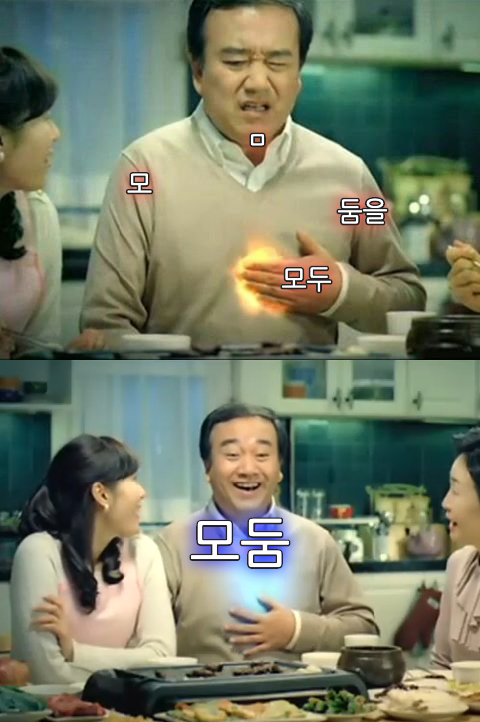

In [81]:
#코모란의 성능 좋음
sentence = '롯데해체하고잘팔리던껌이나팔자진심으로'
komoran.pos(sentence)

[('롯데', 'NNP'),
 ('해체', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('잘', 'MAG'),
 ('팔리', 'VV'),
 ('던', 'ETM'),
 ('껌', 'NNG'),
 ('이나', 'NNP'),
 ('팔자', 'NNG'),
 ('진심', 'NNP'),
 ('으로', 'JKB')]

In [85]:
sentence = '지난해 롯데는포수포지션의구멍으로인해 가을야구를 하지 못했다'
komoran.pos(sentence)

[('지난해', 'NNG'),
 ('롯데', 'NNP'),
 ('는', 'ETM'),
 ('포수', 'NNP'),
 ('포지션', 'NNP'),
 ('의', 'JKG'),
 ('구멍', 'NNG'),
 ('으로', 'JKB'),
 ('인하', 'VV'),
 ('아', 'EC'),
 ('가을', 'NNP'),
 ('야구', 'NNP'),
 ('를', 'JKO'),
 ('하', 'VV'),
 ('지', 'EC'),
 ('못하', 'VX'),
 ('았', 'EP'),
 ('다', 'EC')]

# ----------------------------------------------------------
# Part 2. soynlp
### @YKLee님 자료 참고 
KoNLPy의 새로운 단어가 사전에 추가되지 않는 점을 보완하고자 개발됨. (by Hyunjoong Kim)

확률 모델이 아닌, 주어진 데이터를 기반으로 단어 및 명사 추출, 토큰화, 사용자 사전 추가 및 생성 + KoNLPy 등이 가능

단어 추출 기법은 cohesion 기법 사용

명사는 새로운 단어가 가장 많이 생성되고 사용 빈도가 높아서 따로 추출할 수 있는 기능 추가 

- I. 단어 추출 + 토큰화

- II. 명사 추출

- III. KoNLPy + 사용자 사전

링크: https://github.com/lovit/soynlp


# 함께 이용하면 좋은 라이브러리들

## 세종 말뭉치 정제를 위한 utils
자연어처리 모델 학습을 위하여 세종 말뭉치 데이터를 정제하기 위한 함수들을 제공합니다. 형태소/품사 형태로 정제된 학습용 데이터를 만드는 함수, 용언의 활용 형태를 정리하여 테이블로 만드는 함수, 세종 말뭉치의 품사 체계를 단순화 시키는 함수를 제공합니다.
https://github.com/lovit/sejong_corpus_cleaner

## soyspacing
띄어쓰기 오류가 있을 경우 이를 제거하면 텍스트 분석이 쉬워질 수 있습니다. 분석하려는 데이터를 기반으로 띄어쓰기 엔진을 학습하고, 이를 이용하여 띄어쓰기 오류를 교정합니다.
https://github.com/lovit/soyspacing
pip install soyspacing

## KR-WordRank
토크나이저나 단어 추출기를 학습할 필요없이, HITS algorithm 을 이용하여 substring graph 에서 키워드를 추출합니다.
https://github.com/lovit/KR-WordRank
pip install krwordrank


## soykeyword
키워드 추출기입니다. Logistic Regression 을 이용하는 모델과 통계 기반 모델, 두 종류의 키워드 추출기를 제공합니다. scipy.sparse 의 sparse matrix 형식과 텍스트 파일 형식을 지원합니다.
https://github.com/lovit/soykeyword
pip install soykeyword

# Part 2-1. soynlp - dictionary_building_(noun_and_predicator_extraction)

In [14]:

#!pip install soynlp

In [60]:
import math
import sys
sys.path.insert(0, '../')
import soynlp
print(soynlp.__version__)

0.0.492


In [15]:
import os
print (os.getcwd()) #현재 디렉토리를 확인합니다.

/Users/hy/Dropbox/Studies/Training-and-Techniques/0718


In [16]:
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

corpus_path = '../soynlp/tutorials/2016-10-20.txt' #파일경로
sents = DoublespaceLineCorpus(corpus_path, iter_sent=True)

In [17]:
%%time
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(sents)
nouns = noun_extractor.extract()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=1260, neg=1173, common=12
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 403896 from 223357 sents. mem=1.281 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=4434442, mem=1.880 Gb
[Noun Extractor] batch prediction was completed for 146445 words
[Noun Extractor] checked compounds. discovered 69793 compounds
[Noun Extractor] postprocessing detaching_features : 118538 -> 101025
[Noun Extractor] postprocessing ignore_features : 101025 -> 100918
[Noun Extractor] postprocessing ignore_NJ : 100918 -> 100496
[Noun Extractor] 100496 nouns (69793 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.609 Gb                    
[Noun Extractor] 80.22 % eojeols are covered
CPU times: user 1min 8s, sys: 2.54 s, total: 1min 11s
Wall time: 1min 11s


이 과정은 한 번에 일어나는 경우가 많기 때문에 train_extract() 함수를 이용해도 됩니다.

version 2 에서는 soynlp.utils 의 EojeolCounter 와 LRGraph 를 이용합니다. 명사가 포함되었다고 인식된 어절의 빈도수 비율이 출력됩니다. 71.69 % 의 어절에 추출된 명사가 포함되어 있습니다. 총 86,133 개의 명사가 추출되었으며, 이 중 35,044 개는 복합명사입니다.

복합 명사의 경우에는 min_count 가 1 일 경우에도 탐지가 될 수 있도록 하였습니다. min_count 와 minimum_noun_score 는 extract, train_extract 함수의 argument 로 조절할 수 있습니다.

In [27]:
%%time
nouns = noun_extractor.train_extract(sents)
# nouns = noun_extractor.train_extract(sents, min_count=1, minimum_noun_score=0.3)

[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 403896 from 223357 sents. mem=1.457 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=4434442, mem=1.730 Gb
[Noun Extractor] batch prediction was completed for 146445 words
[Noun Extractor] checked compounds. discovered 69793 compounds
[Noun Extractor] postprocessing detaching_features : 118538 -> 101025
[Noun Extractor] postprocessing ignore_features : 101025 -> 100918
[Noun Extractor] postprocessing ignore_NJ : 100918 -> 100496
[Noun Extractor] 100496 nouns (69793 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.663 Gb                    
[Noun Extractor] 80.22 % eojeols are covered
CPU times: user 1min 12s, sys: 4.22 s, total: 1min 16s
Wall time: 1min 17s


nouns 는 {str: NounScore} 형식의 dict 입니다. 추출된 명사 단어에 대한 빈도수와 명사 점수가 namedtuple 인 NounScore 로 저장되어 있습니다.

version 1 의 명사 추출기에서는 '뉴스'라는 left-side substring 의 빈도수를 명사의 빈도수로 이용하였습니다만, version 2 에서는 어절에서 '뉴스'가 실제로 명사로 이용된 경우만 카운팅 됩니다. '뉴스방송'과 같은 복합명사의 빈도수는 '뉴스'에 포함되지 않습니다.

In [28]:
nouns['뉴스']

NounScore(frequency=4317, score=1.0)

LRNounExtractor_v2._compounds_components 에는 복합 명사의 components 가 저장되어 있습니다. _compounds_components 는 {str:tuple of str} 형식입니다.

In [29]:
for word in ['부산과학기술', '과학기술', '부산과학기술기획평가']:
    print(word, noun_extractor._compounds_components.get(word, None))

부산과학기술 ('부산', '과학기술')
과학기술 None
부산과학기술기획평가 ('부산', '과학기술', '기획', '평가')


In [30]:
list(noun_extractor._compounds_components.items())[:10]

[('잠수함발사탄도미사일', ('잠수함', '발사', '탄도미사일')),
 ('미사일대응능력위원회', ('미사일', '대응', '능력', '위원회')),
 ('글로벌녹색성장연구소', ('글로벌', '녹색성장', '연구소')),
 ('시카고옵션거래소', ('시카고', '옵션', '거래소')),
 ('대한민국특수임무유공', ('대한민국', '특수', '임무', '유공')),
 ('철도산업발전소위원회', ('철도', '산업발전', '소위원회')),
 ('한국의료기기산업협회', ('한국', '의료', '기기', '산업', '협회')),
 ('포괄적핵실험금지조약', ('포괄적', '핵실험', '금지', '조약')),
 ('유엔북한인권사무소', ('유엔', '북한인권', '사무소')),
 ('교육문화체육관광위원', ('교육', '문화체육', '관광', '위원'))]

복합 명사도 nouns 에 포함되어 출력됩니다.

LRNounExtractor_v2.decompose_compound 는 입력된 str 가 복합 명사일 경우, 이를 단일 명사의 tuple 로 분해합니다.

In [31]:
noun_extractor.decompose_compound('두바이월드센터시카고옵션거래소')

('두바이', '월드', '센터', '시카고', '옵션', '거래소')

복합명사가 아닌 경우에는 길이가 1 인 tuple 로 출력됩니다. 

In [32]:
noun_extractor.decompose_compound('두바이월드센터시카고옵션거래소라라라라라')

('두바이월드센터시카고옵션거래소라라라라라',)

### LRNounExtractor_v2 는 soynlp.utils 의 LRGraph 를 이용합니다. 데이터의 L-R 구조를 살펴볼 수 있습니다.
## 링크: https://lovit.github.io/nlp/2018/05/07/noun_extraction_ver1/


## Tokenizer

WordExtractor 로부터 단어 점수를 학습하였다면, 이를 이용하여 단어의 경계를 따라 문장을 단어열로 분해할 수 있습니다. soynlp 는 세 가지 토크나이저를 제공합니다. 띄어쓰기가 잘 되어 있다면 LTokenizer 를 이용할 수 있습니다. 한국어 어절의 구조를 "명사 + 조사" 처럼 "L + [R]" 로 생각합니다. 

### LTokenizer

L parts 에는 명사/동사/형용사/부사가 위치할 수 있습니다. 어절에서 L 만 잘 인식한다면 나머지 부분이 R parts 가 됩니다. LTokenizer 에는 L parts 의 단어 점수를 입력합니다. 

```python
from soynlp.tokenizer import LTokenizer

scores = {'데이':0.5, '데이터':0.5, '데이터마이닝':0.5, '공부':0.5, '공부중':0.45}
tokenizer = LTokenizer(scores=scores)

sent = '데이터마이닝을 공부한다'

print(tokenizer.tokenize(sent, flatten=False))
#[['데이터마이닝', '을'], ['공부', '중이다']]

print(tokenizer.tokenize(sent))
# ['데이터마이닝', '을', '공부', '중이다']
```


In [33]:
noun_extractor.lrgraph.get_r('아이오아이')

[('', 123),
 ('의', 47),
 ('는', 40),
 ('와', 18),
 ('가', 18),
 ('에', 7),
 ('에게', 6),
 ('까지', 2),
 ('랑', 2),
 ('부터', 1)]

topk=10 으로 설정되어 있습니다. topk < 0 으로 설정하면 모든 R set 이 출력됩니다.

In [34]:
noun_extractor.lrgraph.get_r('미사일', topk=-1)

[('', 891),
 ('을', 168),
 ('은', 92),
 ('로', 81),
 ('이', 38),
 ('에', 12),
 ('의', 11),
 ('인', 10),
 ('과', 7),
 ('방어체계', 6),
 ('발사차량', 5),
 ('도', 4),
 ('방어체계를', 3),
 ('대응능력위원회', 2),
 ('마저', 2),
 ('이다', 2),
 ('로서의', 2),
 ('까지', 2),
 ('보다', 2),
 ('이든', 1),
 ('방어능력을', 1),
 ('이나', 1),
 ('방어체계뿐', 1),
 ('방어', 1),
 ('위협이', 1),
 ('방어체계가', 1),
 ('입니다', 1),
 ('방어능력', 1)]

L-R 구조의 L parts 도 확인할 수 있습니다. 이 역시 topk=10 으로 기본값이 설정되어 있습니다.

In [35]:
noun_extractor.lrgraph.get_l('겠다고')

[('하', 61),
 ('않', 50),
 ('추진하', 37),
 ('좋', 29),
 ('유포하', 24),
 ('발부하', 22),
 ('출석시키', 22),
 ('나서', 20),
 ('되', 19),
 ('개선하', 18)]

In [36]:
# R parts 확인.
noun_extractor.lrgraph.get_r('였')

[('다', 196),
 ('던', 34),
 ('습니다', 23),
 ('지만', 16),
 ('고', 16),
 ('으며', 12),
 ('다는', 6),
 ('을', 5),
 ('으나', 5),
 ('는데', 5)]

# -----------------------------------------------------------------------
# Part 2-2. soynlp - DoublespaceLineCorpus

In [37]:
from soynlp.utils import DoublespaceLineCorpus

corpus_fname = 'rawdat_clean_punct.txt'

#구두점 및 숫자 삭제한 데이터
#corpus_fname = 'rawdat_clean2.txt'

corpus = DoublespaceLineCorpus(corpus_fname, iter_sent=True)

DoublespaceLineCorpus 의 iter_sent=True 를 설정하면 for loop 을 돌 때와 corpus 의 길이를 계산할 때, 문장 단위로 계산이 됩니다.
샘플 데이터에는 948 개의 문장이 담겨있습니다.

In [38]:
print('number of sents = {}'.format(len(corpus)))

number of sents = 948


만들어진 DoublespaceLineCorpus 의 iter_sent 를 False 로 변환하면 길이가 933 로 변합니다.
샘플 데이터는 933 개의 문서로 이뤄진 텍스트 파일이며, 948 개의 문장으로 구성되어 있습니다

In [39]:
corpus.iter_sent = False
print('number of docs = {}'.format(len(corpus)))

number of docs = 933


명사, 단어 추출을 위해서 iteration 을 문장 단위로 수행합니다. 이를 위해 DoublespaceLineCorpus 의 iter_sent=True 로 설정합니다.

명사 추출기의 값은 default 를 이용하였습니다. 명사 추출기에 corpus 를 입력하면 명사가 출력됩니다.

In [40]:
from soynlp.noun import LRNounExtractor_v2

corpus.iter_sent = True
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(corpus)


[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=1260, neg=1173, common=12
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 11506 from 948 sents. mem=1.600 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=47795, mem=1.601 Gb
[Noun Extractor] batch prediction was completed for 4702 words
[Noun Extractor] checked compounds. discovered 424 compounds
[Noun Extractor] postprocessing detaching_features : 1763 -> 1566
[Noun Extractor] postprocessing ignore_features : 1566 -> 1544
[Noun Extractor] postprocessing ignore_NJ : 1544 -> 1538
[Noun Extractor] 1538 nouns (424 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.472 Gb                    
[Noun Extractor] 69.55 % eojeols are covered


In [ ]:
조건을 만족하는 명사의 개수는 1538개 입니다. 
명사 추출기에서 사용자가 직접 설정할 수 있는 조건들은 noun_extractor_tutorials 를 봐주세요.

In [41]:
print('number of nouns = {}'.format(len(nouns)))
#number of nouns = 1538

number of nouns = 1538


nouns 는 {str:collections.namedtuple} 형식의 dict 입니다. NounScore 라는 이름의 namedtuple 에는 frequency 와 score 가 저장되어 있습니다.

In [42]:
nouns['학생']

NounScore(frequency=416, score=1.0)

In [43]:
print(nouns['책임'])
print(nouns['책임감'])

print(nouns['친구'])
print(nouns['교생'])
print(nouns['교사'])

NounScore(frequency=1, score=0.5)
NounScore(frequency=5, score=1.0)
NounScore(frequency=60, score=1.0)
NounScore(frequency=58, score=1.0)
NounScore(frequency=181, score=1.0)


In [44]:
print(nouns['프로그램'])
print(nouns['상호작용'])
print(nouns['함께'])

NounScore(frequency=26, score=1.0)
NounScore(frequency=29, score=1.0)
NounScore(frequency=99, score=1.0)


## 길이가 2 이상이며, 빈도수 기준 상위 30 개인 명사를 살펴보면 아래와 같습니다.

In [45]:
selected_nouns = [(noun, score) for noun, score in nouns.items() if len(noun) > 1]
selected_nouns = sorted(selected_nouns, key=lambda x:-x[1].frequency)[:30]

for noun, score in selected_nouns:
    print('{} : {}'.format(noun, score))

학생들 : NounScore(frequency=778, score=1.0)
수업 : NounScore(frequency=623, score=1.0)
학습 : NounScore(frequency=512, score=1.0)
고려 : NounScore(frequency=475, score=1.0)
학습자 : NounScore(frequency=449, score=1.0)
학생 : NounScore(frequency=416, score=1.0)
생각 : NounScore(frequency=408, score=0.9901234567901235)
특성 : NounScore(frequency=389, score=1.0)
실습 : NounScore(frequency=371, score=1.0)
활동 : NounScore(frequency=365, score=1.0)
상황 : NounScore(frequency=281, score=1.0)
능력 : NounScore(frequency=250, score=1.0)
때문 : NounScore(frequency=199, score=1.0)
중요 : NounScore(frequency=197, score=1.0)
교과 : NounScore(frequency=189, score=1.0)
도움 : NounScore(frequency=188, score=1.0)
교사 : NounScore(frequency=181, score=1.0)
변인 : NounScore(frequency=178, score=1.0)
그룹 : NounScore(frequency=176, score=1.0)
성적 : NounScore(frequency=175, score=1.0)
다양 : NounScore(frequency=165, score=1.0)
경우 : NounScore(frequency=157, score=1.0)
피드백 : NounScore(frequency=155, score=1.0)
친구들 : NounScore(frequency=149, score=1.

In [46]:
print(nouns['모둠'])
print(nouns['모둠활동'])
print(nouns['모두'])

NounScore(frequency=130, score=1.0)
NounScore(frequency=11, score=1.0)
NounScore(frequency=93, score=1.0)


# -----------------------------------------------------------
# Part 2-3. soynlp - tagger_usage

tagger 에서 이용하는 단어의 품사는 다음과 같습니다.



In [47]:
from soynlp.pos.tagset import tagset
from pprint import pprint
pprint(tagset)

{'Adjective': '형용사',
 'Adverb': '부사',
 'Determiner': '관형사',
 'Exclamation': '감탄사',
 'Josa': '조사',
 'Noun': '명사',
 'Numeral': '수사',
 'Pronoun': '대명사',
 'Symbol': '기호',
 'Verb': '동사'}


SimpleTagger 는 사전 기반으로 작동하는 품사 판별기 입니다. 이는 세 가지 구성 요소로 이뤄져 있습니다.
(1) 주어진 문장에서 단어열 후보를 생성하는 generator,
(2) 여러 개의 단어열 후보 중에서 가장 적절한 후보를 선택하는 evaluator,
(3) 처리하지 못한 단어들에 대한 후처리 기능을 담당할 postprocessor. 
그리고 (1) 의 generator 는 사전 기반으로 작동하기 때문에 dictionary 가 필요합니다. 
아래는 dict[str]=set 형식의 input 을 이용하는 Dictionary 를 만드는 과정입니다.

from soynlp.pos import Dictionary
dictionary = Dictionary(YOUR_DICT)

In [48]:
####에러남.
####ImportError: cannot import name 'Dictionary' from 'soynlp.pos' (C:\ProgramData\Anaconda3\lib\site-packages\soynlp\pos\__init__.py)


from soynlp.pos import Dictionary
from soynlp.pos import LRTemplateMatcher
from soynlp.pos import LREvaluator
from soynlp.pos import SimpleTagger
from soynlp.pos import UnknowLRPostprocessor

pos_dict = {
    'Adverb': {'너무', '매우'}, 
    'Noun': {'너무너무너무', '아이오아이', '아이', '노래', '오', '이', '고양'},
    'Josa': {'는', '의', '이다', '입니다', '이', '이는', '를', '라', '라는'},
    'Verb': {'하는', '하다', '하고'},
    'Adjective': {'예쁜', '예쁘다'},
    'Exclamation': {'우와'}    
}

dictionary = Dictionary(pos_dict)

ImportError: cannot import name 'Dictionary'

In [145]:
#dictionary.post_dict

In [49]:
from pprint import pprint

class Dictionary:
    def __init__(self, pos_dict=None):
        self.pos_dict = {
            '부사': {'너무', '매우'}, 
            '명사': {'너무너무너무', '아이오아이', '아이', '노래', '오', '이', '고양', 'ahen'},
            '조사': {'는', '의', '이다', '입니다', '이', '이는', '를', '라', '라는'},
            '동사': {'하는', '하다', '하고'},
            '형용사': {'예쁜', '예쁘다'},
            '감탄사': {'우와'}
          }
        self.max_length = self._check_max_length(self.pos_dict)
    
    def _check_max_length(self, pos_dict):
        return max((len(word) for words in pos_dict.values() for word in words))
    
    def get_pos(self, word):
        tags = []
        for pos, words in self.pos_dict.items():
            if word in words:
                tags.append(pos)
        return tags
    
    def word_is_tag(self, word, tag):
        return word in self.pos_dict.get(tag, {})
dictionary = Dictionary()


In [50]:
pprint(dictionary.pos_dict) 

{'감탄사': {'우와'},
 '동사': {'하다', '하고', '하는'},
 '명사': {'오', '고양', '아이', 'ahen', '이', '너무너무너무', '아이오아이', '노래'},
 '부사': {'너무', '매우'},
 '조사': {'는', '이는', '라는', '이', '의', '입니다', '를', '라', '이다'},
 '형용사': {'예쁘다', '예쁜'}}


In [51]:
dictionary.get_pos('이') 

['명사', '조사']

'아이오아이/명사'가 사전에 등록되어 있는지 확인할 수도 있습니다. 

In [52]:
dictionary.word_is_tag('아이오아이', '명사') 

True

### (오류?) add_words(tag, words) 는 사전에 품사가 tag 인 단어들을 추가하는 기능입니다. words 는 하나의 str 이어도 되며, 여러 개의 단어로 이뤄진 collection of str 입니다. 

링크: https://github.com/lovit/soynlp/blob/master/tutorials/tagger_usage.ipynb

In [53]:
print('# Add a word with a tag')
dictionary.add_words('Noun', '앙순이')
pprint(dictionary.pos_dict)

print('\n# Add words with a tag')
dictionary.add_words('Noun', ['워너원', '아이돌'])
pprint(dictionary.pos_dict)

# Add a word with a tag


AttributeError: 'Dictionary' object has no attribute 'add_words'

In [55]:
dictionary.add_words('Name', 'lovit')

AttributeError: 'Dictionary' object has no attribute 'add_words'

# --------------------------------------------------------
# Part 03. soyspacing
띄어쓰기 오류 교정 라이브러리입니다. CRF 와 같은 머신러닝 알고리즘이 아닌, 직관적인 접근법으로 띄어쓰기를 교정합니다.

링크1: https://github.com/lovit/soyspacing
링크2: https://github.com/lovit/soyspacing/blob/master/tutorials/presentation.pdf


In [1]:
#!pip install soyspacing

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
#!git clone https://github.com/lovit/soyspacing.git

'clone'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [56]:
import sys

YOUR_SOY_GIT_REPOSITORY = '../soyspacing'
sys.path.append('%s' % YOUR_SOY_GIT_REPOSITORY)

In [57]:
import soyspacing
print(soyspacing.__version__)

1.0.15


In [58]:
#학습은 텍스트 파일 경로를 입력합니다.
from soyspacing.countbase import RuleDict, CountSpace

corpus_fname = '../soyspacing/demo_model/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)

all tags length = 694236 --> 57795, (num_doc = 15602)

#학습된 모델의 저장을 위해서는 모델 파일 경로를 입력합니다. JSON 형식으로 모델을 저장할 수 있습니다. 저장된 파일 용량을 고려하며 JSON 형식이 아닐 때 save / load 가 좀 더 쉽습니다.



In [99]:
#Load model and rules
#아래와 같이 모델을 중복으로 로딩할 수 있음
#중복으로 로딩될 때에는 (chars,tags)의 빈도수가 추가되는 것

In [59]:
model_fname = '../soyspacing/demo_model/test.model'
model.save_model(model_fname, json_format=False)

model2 = CountSpace()
model2.load_model('../soyspacing/demo_model/test.model', json_format=False)

## 띄어쓰기 교정 함수 적용
### arguments
  - 4개의 parameter
#### force_abs_threshold: 점수의 절대값이 이 수준 이상이면 최고점이 아니더라도 즉각 태깅
#### nonspace_threshold : 이 점수 이하일 때만 0으로 태깅
#### space_threshold : 이 점수 이상일 때만 1로 태깅
#### min_count : L, C, R 각각의 feature 빈도수가 min_count 이하이면 불확실한 정보로 판단, 띄어쓰기 계산 시 무시

#### verbose: iteration 마다 띄어쓰기가 어떻게 되고 있는지 확인
#### rules : 점수와 관계없이 반드시 태깅을 먼저 할 (chars, tags)

In [60]:
#띄어쓰기 교정을 위한 패러메터는 네 가지가 있습니다. 이를 입력하지 않으면 default value 를 이용합니다.

verbose=False
mc = 10  # min_count
ft = 0.3 # force_abs_threshold
nt =-0.3 # nonspace_threshold
st = 0.3 # space_threshold

sent = '이건진짜좋은영화 라라랜드진짜좋은영화'

# with parameters
sent_corrected, tags = model.correct(
    sent,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc
)

# without parameters
sent_corrected, tags = model.correct(sent)

print(sent_corrected)
# 이건 진짜 좋은 영화 라라랜드진짜 좋은 영화

print('before: %s' % sent)
print('after : %s' % sent_corrected)

이건 진짜 좋은 영화 라라랜드진짜 좋은 영화
before: 이건진짜좋은영화 라라랜드진짜좋은영화
after : 이건 진짜 좋은 영화 라라랜드진짜 좋은 영화


model.correct()의 결과물은 띄어쓰기가 수정된 문장과 각 글자의 태그가 출력됨
띄어쓰기를 해야할지 말지 모호한 경우에는 None으로 표시되며, 띄어쓰기 수정 시에는 None은 0과 함께 띄지 않음

In [63]:
tags

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, None, None, 1, 0, 1, 0, 1]

### space_rules.txt는 다섯가지 단어에 대하여 띄어쓰기 규칙을 hard coding 할 수 있도록 넣어둔 사전입니다.
예 - 진짜    101

### 위 줄은 '진짜'라는 단어의 앞/뒤는 반드시 띄어쓰라는 의미입니다. 아래 문장에서 '라라랜드진짜'의 경우, '진짜'라는 단어를 제대로 알지 못해서 띄어쓰기를 하지 못했습니다 (태그가 None, None입니다)
이건 진짜 좋은 영화 라라랜드진짜 좋은 영화

### 알려진 단어/어절에 대해서는 이와 같이 띄어쓰기를 강제할 수 있습니다.
RuleDict 안에는 chars: tags가 들어있음
    - chars: str type
    - tags: tuple type
rules는 룰 단어 길이보다 1이 더 긴 태그 정보가 들어가야 함.
    -룰 단어 앞에를 띄우는지 (1), 안띄우는지 (0)를 표시해야 함
    -불확실한 경우에는 룰 파일에 ?라고 기록하면 None으로 바꿔서 로딩
        - e.g: 지수가 ?001 -> "지수가": (None, 0, 0, 1)


In [64]:
with open('../soyspacing/tutorials/space_rules.txt', encoding='utf-8') as f:
    for doc in f:
        print(doc.strip())

가령	101
진짜	101
가게는	1001
가게로	1001
가게야	1001


In [65]:
rule_fnames = ['../soyspacing/tutorials/space_rules.txt']

rule_dict = RuleDict(rule_fnames)
rule_dict.rule_dict

{'가령': (1, 0, 1),
 '진짜': (1, 0, 1),
 '가게는': (1, 0, 0, 1),
 '가게로': (1, 0, 0, 1),
 '가게야': (1, 0, 0, 1)}

verbose = True 일 때는 각 단계마다 띄어쓰기 태그가 어떻게 수정되는지가 출력됨

In [66]:
model.correct(    
    sent,
    verbose=True,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc,
    rules=rule_dict
)

Input: ? ? ? ? ? ? ? 1 ? ? ? ? ? ? ? ? ? 1 
이건진짜좋은영화 라라랜드진짜좋은영화
Ruled: ? 1 0 1 ? ? ? 1 ? ? ? 1 0 1 ? ? ? 1 
이건 진짜 좋은영화 라라랜드 진짜 좋은영화
Force tagged (iter=1): 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 
Force tagged (iter=2): 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 


('이건 진짜 좋은 영화 라라랜드 진짜 좋은 영화',
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

debug=True 일 때에는 각 글자의 feature 빈도수, score, lcr score를 출력, force tagging, sequential tagging 순서에 따라 출력

In [67]:

model.correct(
    sent,    
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc,
    rules=rule_dict, 
    debug=True
)

rule tagging (b=2, e=4), subchar=진짜, tags=(1, 0, 1)
rule tagging (b=12, e=14), subchar=진짜, tags=(1, 0, 1)
0: 이 (-1.000, 13)	lcr = (0.000, 0.000, -1.000)
1: 건 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
2: 진 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
3: 짜 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
4: 좋 (-1.000, 466)	lcr = (-1.000, 0.000, -1.000)
5: 은 (0.504, 715)	lcr = (0.000, 0.403, 0.604)
6: 영 (-1.000, 781)	lcr = (-1.000, -1.000, -1.000)
7: 화 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
8: 라 (-0.998, 725)	lcr = (-1.000, -1.000, -0.994)
9: 라 (-0.942, 873)	lcr = (-0.882, -0.967, -0.977)
10: 랜 (-1.000, 839)	lcr = (-1.000, -1.000, 0.000)
11: 드 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
12: 진 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
13: 짜 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
14: 좋 (-1.000, 466)	lcr = (-1.000, 0.000, -1.000)
15: 은 (0.502, 713)	lcr = (0.000, 0.403, 0.601)
16: 영 (-1.000, 713)	lcr = (-1.000, -1.000, 0.000)
17: 화 (0.000, 0)	lcr = (0.000, 0.000, 0.000)
force tagging i=0, score=-1.000
force tagging i=4

('이건 진짜 좋은 영화 라라랜드 진짜 좋은 영화',
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [68]:
verbose

False

In [69]:
model.correct(sent, mc, ft, nt, st, rule_dict, verbose=verbose)
# ('이건 진짜 좋은 영화 라라랜드 진짜 좋은 영화',
# [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

('이건 진짜 좋은 영화 라라랜드 진짜 좋은 영화',
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

## 마지막으로, Topic-specific 한 데이터셋

In [73]:
sent = '롯데같은야구경기 껌이나팔자진심으로'

sent_corrected, tags = model.correct(
    sent,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc
)

print('before: %s' % sent)
print('after : %s' % sent_corrected)

롯데같은야구경기 껌이나팔자진심으로
before: 롯데같은야구경기 껌이나팔자진심으로
after : 롯데같은야구경기 껌이나팔자진심으로
